In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm
from kuramoto import * # import the kuramoto classes from file 
from utils import *

In [8]:
# Set up model parameters 
epsilon = 0 
eta = 0 # asymmetry parameter
sigma = 0.001 # disorder
mean_omega = 0.02


# Set up simulation parameters 
L = 128
T = 2e3
n_frames = T

# if we want to impose a gradient in oscillation frequencies 
omegas = mean_omega/(1 + np.arange(L)/L*0.2)

# Initialise the model and run the simulation 
model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=[0, 0])
model.initialise(L, T, n_frames, seed=1000)
model.omegas = omegas 
model.evolve() 

100%|██████████| 2000/2000 [00:00<00:00, 113090.60it/s]


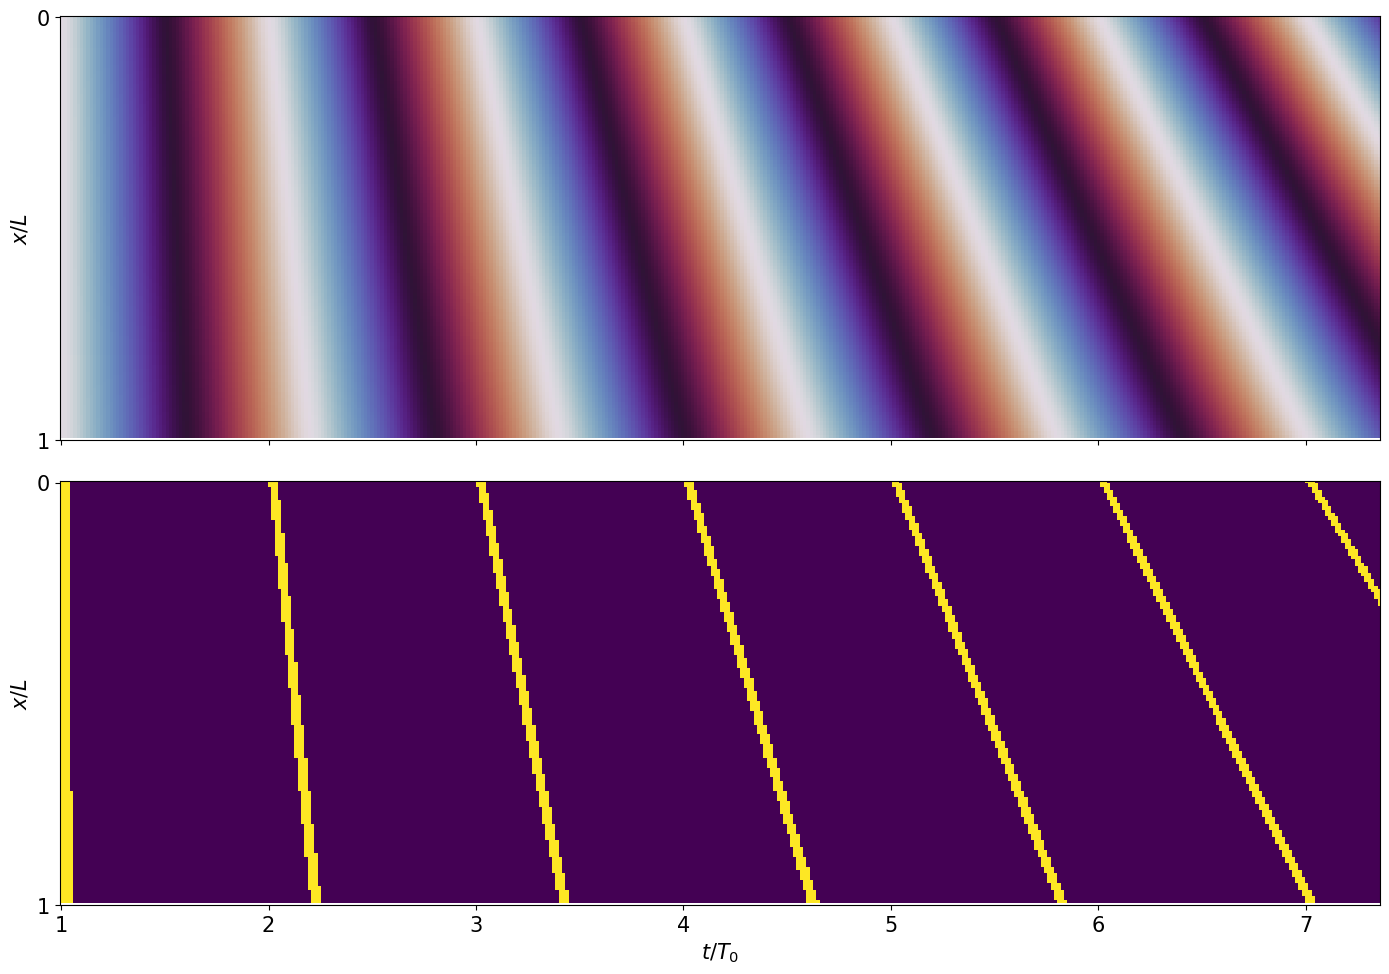

In [9]:
phases = model.res
plt.rc('font', size=15)
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(24, 10))
axes[0].imshow(phases[::5].T, interpolation='None', cmap='twilight')
axes[0].set_ylabel(r'$x/L$')
axes[1].imshow(phases[::5].T < np.pi/12, interpolation='None')
axes[1].set_ylabel(r'$x/L$')
axes[1].set_yticks([0, L], [0, 1])
axes[1].set_xticks(np.arange(7)*2*np.pi/mean_omega/5, np.arange(7)+1)
plt.xlabel(r'$t/T_0$')
plt.tight_layout()
# plt.title(r'$\epsilon={}, \sigma={}, g=[{}, {}]'.format(epsilon, sigma, g[0], g[-1]))
plt.savefig('Figures/no_interaction_sim.png')
plt.show() 

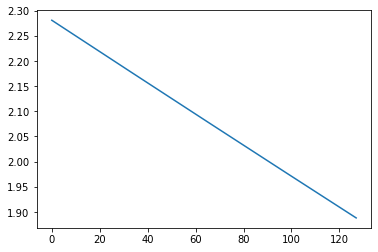

In [6]:
f = phases[-1]
shift(f)
plt.plot(f)
plt.show() 